# clasificaciòn modelo lineal mco

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("personas.xlsx",index_col="Nombre")

In [4]:
df.head()

,X1,X2,Y
Nombre,,,
Luis,400,20,0
Francisco,450,35,0
Maria,500,25,0
Alvaro,600,15,0
Soledad,600,30,0


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# datos prueba y entrenamiento
x=df[["X1","X2"]]
y=df['Y']
np.random.seed(1234)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)


In [10]:
X_train

,X1,X2
Nombre,,
Soledad,600,30
Luis,400,20
Stella,550,45
Rocio,1050,60
Johanna,900,40
Sonia,1200,50
Esteban,700,35
Pedro,750,70
Juan,1000,40


In [11]:
X_test


,X1,X2
Nombre,,
Luz,850,15
Valentina,600,65
Maria,500,25
Alvaro,600,15
Francisco,450,35
Liliana,900,75
Sandra,700,25


In [13]:
#crear y entrenar modelo
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred1=reg.predict(X_test)

In [15]:
y_pred1


array([0.25242303, 0.69050522, 0.08643439, 0.04108546, 0.17405082,
       1.07399425, 0.25550444])

In [16]:
y_pred=np.rint(y_pred1)

In [17]:
y_pred

array([0., 1., 0., 0., 0., 1., 0.])

In [19]:
accuracy_score(Y_test,y_pred)

1.0

In [22]:
reg.coef_

array([0.00084535, 0.0129884 ])

In [23]:
reg.intercept_

-0.6609506233540565

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[5, 0],
       [0, 2]], dtype=int64)

# k vecinos mas cercanos

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# instanciar vecino
vec= KNeighborsClassifier(n_neighbors=3)
vec.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
y_pred=vec.predict(X_test)

In [32]:
accuracy_score(Y_test,y_pred)

0.5714285714285714

In [33]:
confusion_matrix(Y_test,y_pred)

array([[3, 2],
       [1, 1]], dtype=int64)

In [35]:
acc=[]
for i in range(2,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred=knn.predict(X_test)
    acc.append(accuracy_score(Y_test,pred))

In [36]:
acc


[0.8571428571428571,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.5714285714285714,
 0.5714285714285714,
 0.2857142857142857,
 0.7142857142857143,
 0.2857142857142857,
 0.2857142857142857]

In [39]:
import matplotlib.pyplot as plt

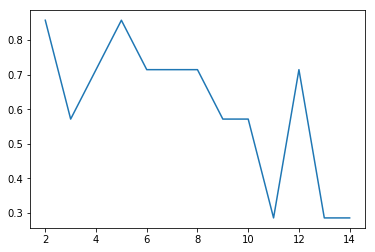

In [41]:
plt.plot(range(2,15),acc)